# Flight Price Prediction

Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('Data_Train.xlsx')
df

In [ ]:
df1=pd.read_excel('Test_set.xlsx')
df1

In [ ]:
df.head()

In [ ]:
df1.head()

# Checking Null Values

In [ ]:
df.isnull().sum()

In [ ]:
df1.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df1.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=lc.fit_transform(df[i].values.reshape(-1,1))
df

In [ ]:
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=lc.fit_transform(df1[i].values.reshape(-1,1))
df1        

In [ ]:
df1.isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df1.dtypes

# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.countplot(x='Airline',data=df)
print(df['Airline'].value_counts())

In [ ]:
sns.countplot(x='Airline',data=df1)
print(df1['Airline'].value_counts())

In [ ]:
sns.histplot(x='Date_of_Journey',data=df,bins=20,kde=True)

In [ ]:
sns.histplot(x='Date_of_Journey',data=df1,bins=20,kde=True)

In [ ]:
sns.countplot(x='Source',data=df)
print(df['Source'].value_counts())

In [ ]:
sns.countplot(x='Source',data=df1)
print(df1['Source'].value_counts())

In [ ]:
sns.countplot(x='Destination',data=df)
print(df['Destination'].value_counts())

In [ ]:
sns.countplot(x='Destination',data=df1)
print(df1['Destination'].value_counts())

In [ ]:
sns.histplot(x='Route',data=df,bins=20,kde=True)

In [ ]:
sns.histplot(x='Route',data=df1,bins=20,kde=True)

In [ ]:
sns.histplot(x='Dep_Time',data=df,bins=20,kde=True)

In [ ]:
sns.histplot(x='Dep_Time',data=df1,bins=20,kde=True)

In [ ]:
sns.histplot(x='Arrival_Time',data=df,bins=20,kde=True)

In [ ]:
sns.histplot(x='Arrival_Time',data=df1,bins=20,kde=True)

In [ ]:
sns.histplot(x='Duration',data=df,bins=20,kde=True)

In [ ]:
sns.histplot(x='Duration',data=df1,bins=20,kde=True)

In [ ]:
sns.countplot(x='Total_Stops',data=df)
print(df['Total_Stops'].value_counts())

In [ ]:
sns.countplot(x='Total_Stops',data=df1)
print(df['Total_Stops'].value_counts())

In [ ]:
sns.countplot(x='Additional_Info',data=df)
print(df['Additional_Info'].value_counts())

In [ ]:
sns.countplot(x='Additional_Info',data=df1)
print(df1['Additional_Info'].value_counts())

In [ ]:
sns.histplot(x='Price',data=df,bins=20,kde=True)

# Describing DataSets

In [ ]:
df.describe()

In [ ]:
df1.describe()

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),linecolor='black',linewidth=0.2,fmt='0.2f',annot=True)

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.describe(),linecolor='black',linewidth=0.2,fmt='0.2f',annot=True)

In [ ]:
df.corr()

In [ ]:
df1.corr()

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),linecolor='black',linewidth=0.2,fmt='0.2f',annot=True)

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.corr(),linecolor='black',linewidth=0.2,fmt='0.2f',annot=True)

# Outliers Checking

In [ ]:
df.skew()

Taking -/+ 0.5 as the threshold value

In [ ]:
df1.skew()

Taking -/+ 0.5 as the threshold value

In [ ]:
df['Airline'].plot.box()

In [ ]:
df['Destination'].plot.box()

In [ ]:
df['Arrival_Time'].plot.box()

In [ ]:
df['Total_Stops'].plot.box()

In [ ]:
df['Additional_Info'].plot.box()

In [ ]:
df['Price'].plot.box()

In [ ]:
df1['Destination'].plot.box()

In [ ]:
df1['Arrival_Time'].plot.box()

In [ ]:
df1['Total_Stops'].plot.box()

In [ ]:
df1['Additional_Info'].plot.box()

# Outlier Removal

In [ ]:
df.shape

In [ ]:
from scipy.stats import zscore

In [ ]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)


In [ ]:
df_new=df[(z<3).all(axis=1)]
df_new

In [ ]:
Data_loss=((10683-10578)/10683)*100
Data_loss

In [ ]:
df1.shape

In [ ]:
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

In [ ]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

In [ ]:
Data1_loss=((2671-2668)/2671)*100
Data1_loss

# Separating data in x and y

In [ ]:
x=df.drop('Price',axis=1)
y=df['Price']

In [ ]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

# Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=df_new
test=df1_new

In [ ]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77)

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
pred_test=lr.predict(x_test)
pred_test

In [ ]:
print(r2_score(y_test,pred_test))

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR(kernel='linear')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()


In [ ]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=73)

In [ ]:
dtr.fit(x_train,y_train)

In [ ]:
pred_test=dtr.predict(x_test)
pred_test

In [ ]:
print(r2_score(y_test,pred_test))

# Cross Validation of datasets

In [ ]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv_score is {cv_mean} and the accuracy score for training is {Train_accuracy} and the accuracy score for testing is {Test_accuracy}')
    print('\n')

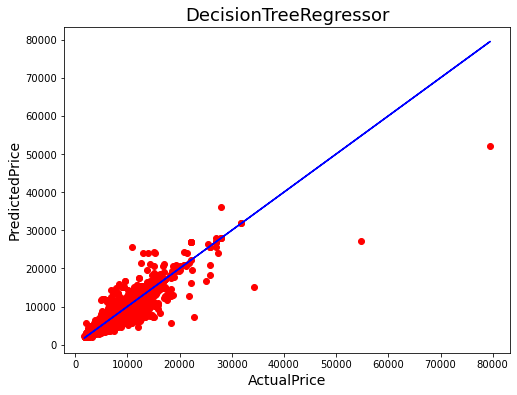

In [209]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='red')
plt.plot(y_test,y_test,color='b')
plt.xlabel('ActualPrice',fontsize=14)
plt.ylabel('PredictedPrice',fontsize=14)
plt.title('DecisionTreeRegressor',fontsize=18)
plt.show()

# Regularization

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [213]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [214]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.26305881102915185

# Ensemble technique

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [216]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score :',rfs*100)

rfscore= cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 score : 87.38101709264203
Cross Val Score : 86.19434625606341


# Saving the Model

In [218]:
import pickle
filename='Flight_price.pred'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [220]:
loaded_model=pickle.load(open('Flight_price.pred','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8738101709264203


In [221]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Predicted,11005.420167,3939.81,7417.88,7656.71,11105.62,11384.58,10066.203333,3776.92,5277.0,11873.48,...,2885.26,13199.85,4041.19,10523.41,5225.24,10262.0,3313.62,5862.24,4030.23,13782.85
Original,11005.420167,3939.81,7417.88,7656.71,11105.62,11384.58,10066.203333,3776.92,5277.0,11873.48,...,2885.26,13199.85,4041.19,10523.41,5225.24,10262.0,3313.62,5862.24,4030.23,13782.85
